# 数据分析案例

In [28]:
import numpy as np
import pandas as pd
import matplotlib as plt
from datetime import datetime
# 让图表直接在Jupyter Notebook中展示出来
%matplotlib inline
# 解决中文乱码问题
plt.rcParams['font.sans-serif']='SimHei'
# 解决负号无法正常显示问题
plt.rcParams['axes.unicode_minus']=False
%config InlineBackend.figure_format='svg'

## 报表

In [29]:
# parse_dates参数表示将数据解析为时间格式
data = pd.read_csv('order.csv', parse_dates=['成交时间'], encoding='gbk')
data.head()
# data.info()

,商品ID,类别ID,门店编号,单价,销量,成交时间,订单ID
0,30006206.0,915000003.0,CDNL,25.23,0.328,2018-01-01,20170103CDLG000210052759
1,30163281.0,914010000.0,CDNL,2.00,2.000,2018-01-02,20170103CDLG000210052759
2,30200518.0,922000000.0,CDNL,19.62,0.230,2018-01-03,20170103CDLG000210052759
3,29989105.0,922000000.0,CDNL,2.80,2.044,2018-01-04,20170103CDLG000210052759
4,30179558.0,915000100.0,CDNL,47.41,0.226,2018-01-05,20170103CDLG000210052759


In [30]:
this_month = data[(data['成交时间'] >= datetime(2018, 2, 1)) & (data['成交时间'] <= datetime(2018, 2, 28))]
last_month = data[(data['成交时间'] >= datetime(2018, 1, 1)) & (data['成交时间'] <= datetime(2018, 1, 31))]
same_month = data[(data['成交时间'] >= datetime(2017, 2, 1)) & (data['成交时间'] <= datetime(2017, 2, 28))]
def get_month_data(data):
    sale = (data['单价'] * data['销量']).sum() # 销售额
    traffic = data['订单ID'].drop_duplicates().count() # 客流量
    s_t = sale / traffic
    return sale, traffic, s_t
# 计算本月相关指标
sale_1, traffic_1, s_t_1 = get_month_data(this_month)
# 计算上月相关指标
sale_2, traffic_2, s_t_2 = get_month_data(last_month)
# 计算去年同期相关指标
sale_3, traffic_3, s_t_3 = get_month_data(same_month)

report = pd.DataFrame([[sale_1, sale_2, sale_3], 
                      [traffic_1, traffic_2, traffic_3], 
                     [s_t_1, s_t_2, s_t_3]], columns=['本月累计', '上月同期', '去年同期'], 
                      index=['销售额', '客流量', '客单价'])
report

,本月累计,上月同期,去年同期
销售额,10412.780070,9940.972910,8596.313470
客流量,343.000000,315.000000,262.000000
客单价,30.357959,31.558644,32.810357


In [31]:
# 添加同比和环比字段
report['同比'] = report['本月累计'] / report['上月同期'] - 1
report['环比'] = report['本月累计'] / report['去年同期'] - 1
report

,本月累计,上月同期,去年同期,同比,环比
销售额,10412.780070,9940.972910,8596.313470,0.047461,0.211308
客流量,343.000000,315.000000,262.000000,0.088889,0.309160
客单价,30.357959,31.558644,32.810357,-0.038046,-0.074745


In [32]:
report.to_csv('order_output.csv')

## 超市指标数据分析

In [33]:
data = pd.read_csv('order_2.csv', parse_dates=['成交时间'], encoding='gbk')
data.head()

,商品ID,类别ID,门店编号,单价,销量,成交时间,订单ID
0,30006206,915000003,CDNL,25.23,0.328,2017-01-03 09:56:00,20170103CDLG000210052759
1,30163281,914010000,CDNL,2.00,2.000,2017-01-03 09:56:00,20170103CDLG000210052759
2,30200518,922000000,CDNL,19.62,0.230,2017-01-03 09:56:00,20170103CDLG000210052759
3,29989105,922000000,CDNL,2.80,2.044,2017-01-03 09:56:00,20170103CDLG000210052759
4,30179558,915000100,CDNL,47.41,0.226,2017-01-03 09:56:00,20170103CDLG000210052759


### 哪些类别的商品比较畅销

In [34]:
data.groupby('类别ID')['销量'].sum().reset_index().sort_values(by='销量', ascending=False).head(10)

,类别ID,销量
240,922000003,425.328
239,922000002,206.424
251,923000006,190.294
216,915030104,175.059
238,922000001,121.355
367,960000000,121.000
234,920090000,111.565
249,923000002,91.847
237,922000000,86.395
247,923000000,85.845


### 哪些商品比较畅销

In [35]:
pd.pivot_table(data, index='商品ID', values='销量', aggfunc='sum').reset_index().sort_values(by='销量', ascending=False).head(10)

,商品ID,销量
8,29989059,391.549
18,29989072,102.876
469,30022232,101.000
523,30031960,99.998
57,29989157,72.453
476,30023041,64.416
505,30026255,62.375
7,29989058,56.052
510,30027007,48.757
903,30171264,45.000


### 不同门店的销售额占比

In [36]:
data['销售额']=data['销量'] * data['单价']
x = data.groupby('门店编号')['销售额'].sum().reset_index()['销售额']
x

0    10908.82612
1     8059.47867
2     9981.76166
Name: 销售额, dtype: float64

Text(0.5, 1.0, '不同门店销售额占比')

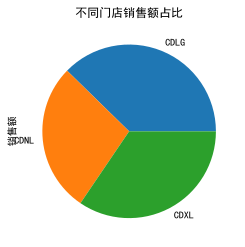

In [37]:
import matplotlib.pyplot as plt
# 让图表直接在Jupyter Notebook中展示出来
%matplotlib inline
# 解决中文乱码问题
plt.rcParams['font.sans-serif']='SimHei'
# 解决负号无法正常显示问题
plt.rcParams['axes.unicode_minus']=False
# 绘制饼图
(data.groupby('门店编号')['销售额'].sum() / data['销售额'].sum()).plot.pie()
# plt.subplot(1, 1, 1)
# labels = data['门店编号'].unique()
# plt.pie(x, labels=labels, autopct='%.0f%%')
plt.title('不同门店销售额占比', loc='center')

## 银行坏账率数据分析

In [38]:
# 导入数据源
data = pd.read_csv('loan.csv', encoding='gbk')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
用户ID    150000 non-null int64
好坏客户    150000 non-null int64
年龄      150000 non-null int64
负债率     150000 non-null float64
月收入     120269 non-null float64
家属数量    146076 non-null float64
dtypes: float64(3), int64(3)
memory usage: 6.9 MB


### 收入越高的人坏账率越低？

从上面的信息可以看到月收入是有缺失值的，先做个缺失值处理，这里采用均值填充

In [39]:
data = data.fillna({'月收入': data['月收入'].mean()})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
用户ID    150000 non-null int64
好坏客户    150000 non-null int64
年龄      150000 non-null int64
负债率     150000 non-null float64
月收入     150000 non-null float64
家属数量    146076 non-null float64
dtypes: float64(3), int64(3)
memory usage: 6.9 MB


In [40]:
data.head(10)

,用户ID,好坏客户,年龄,负债率,月收入,家属数量
0,1,1,45,0.802982,9120.000000,2.0
1,2,0,40,0.121876,2600.000000,1.0
2,3,0,38,0.085113,3042.000000,0.0
3,4,0,30,0.036050,3300.000000,0.0
4,5,0,49,0.024926,63588.000000,0.0
5,6,0,74,0.375607,3500.000000,1.0
6,7,0,57,5710.000000,6670.221237,0.0
7,8,0,39,0.209940,3500.000000,0.0
8,9,0,27,46.000000,6670.221237,NaN
9,10,0,57,0.606291,23684.000000,2.0


In [41]:
# 将连续值划分区间
cut_bins = [0, 5000, 10000, 15000, 20000, 100000]
income_cut = pd.cut(data['月收入'], cut_bins)
income_cut

0           (5000, 10000]
1               (0, 5000]
2               (0, 5000]
3               (0, 5000]
4         (20000, 100000]
               ...       
149995          (0, 5000]
149996      (5000, 10000]
149997      (5000, 10000]
149998      (5000, 10000]
149999      (5000, 10000]
Name: 月收入, Length: 150000, dtype: category
Categories (5, interval[int64]): [(0, 5000] < (5000, 10000] < (10000, 15000] < (15000, 20000] < (20000, 100000]]

逾期不还用户的好坏字段标记为1，非逾期不还用户的好坏字段标记为0，因此坏账率就等于好坏字段之和（坏账客户数）与好坏客户字段的计数（所有借款用户）的比值

In [42]:
# 各区间总借款用户数
all_income_user = data['好坏客户'].groupby(income_cut).count()
all_income_user

月收入
(0, 5000]          54225
(5000, 10000]      75822
(10000, 15000]     13035
(15000, 20000]      3181
(20000, 100000]     2033
Name: 好坏客户, dtype: int64

In [43]:
# 各区间逾期不还用户数
bad_income_user = data['好坏客户'].groupby(income_cut).sum()
bad_income_user

月收入
(0, 5000]          4747
(5000, 10000]      4421
(10000, 15000]      547
(15000, 20000]      133
(20000, 100000]     109
Name: 好坏客户, dtype: int64

In [44]:
# 坏账率 = 逾期不还用户数 / 总借款用户数
bad_rate = bad_income_user / all_income_user
bad_rate

月收入
(0, 5000]          0.087543
(5000, 10000]      0.058308
(10000, 15000]     0.041964
(15000, 20000]     0.041811
(20000, 100000]    0.053615
Name: 好坏客户, dtype: float64

Text(0, 0.5, '坏账率')

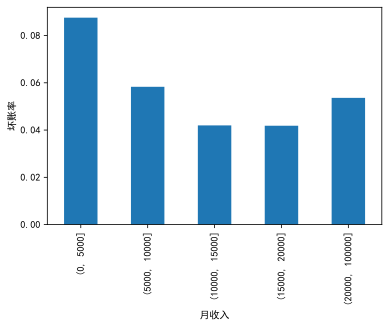

In [45]:
# 绘制月收入与坏账率关系图
bad_rate.plot.bar()
plt.ylabel('坏账率')

### 年龄和坏账率有什么关系？

In [46]:
age_cut = pd.cut(data['年龄'], 6)
all_age_user = data['好坏客户'].groupby(age_cut).count()
bad_age_user = data['好坏客户'].groupby(age_cut).sum()
bad_rate = bad_age_user / all_age_user
bad_rate

年龄
(-0.109, 18.167]    0.000000
(18.167, 36.333]    0.110124
(36.333, 54.5]      0.081645
(54.5, 72.667]      0.041719
(72.667, 90.833]    0.021585
(90.833, 109.0]     0.022495
Name: 好坏客户, dtype: float64

Text(0, 0.5, '坏账率')

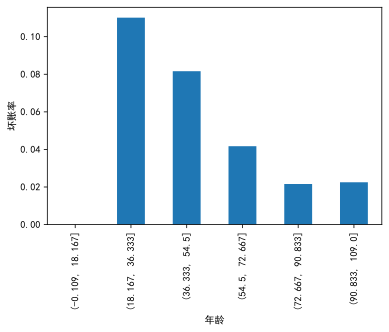

In [47]:
# 绘制年龄与坏账率的关系图
bad_rate.plot.bar()
plt.ylabel('坏账率')